In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
train=pd.read_csv('titanic_train.csv')

df=train.copy()

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Looks like we have missing values in Age, Cabin and Embarked columns, lets check further 

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have quite a lot of missing values from Cabin and Age and few from Embarked column. Need to deal with them 

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis

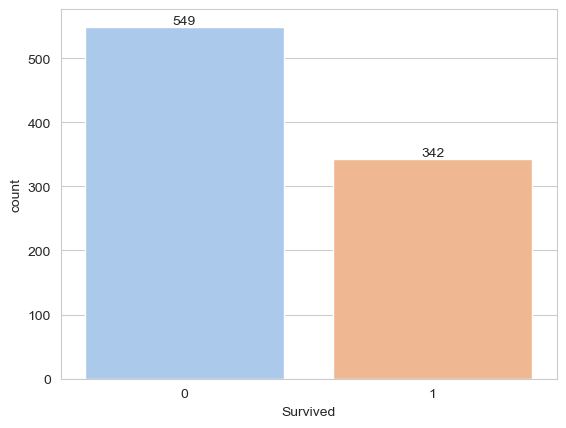

In [10]:
ax= sns.countplot(x='Survived',data=df,palette='pastel')
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

Looks like, most of the passengers didn't survive (549 Nos), almost 63% 

Lets check further using Sex as Hue 

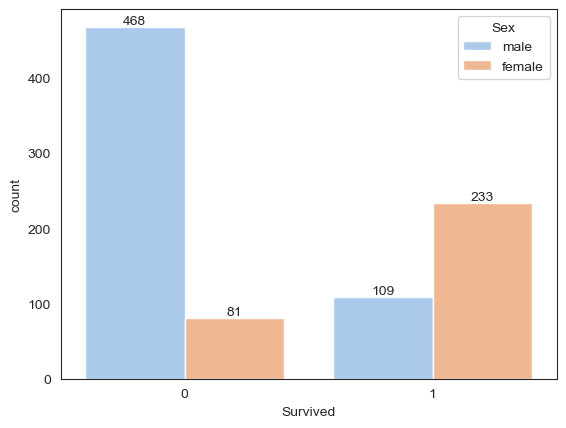

In [16]:
sns.set_style("white")
ax= sns.countplot(x='Survived',hue='Sex',data=df,palette='pastel')
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

Most of the passengers who didnt survive are male and most of survived ones are Female, Few male passengers survived out of total male passengers.

Lets check survival rate with respect to Pclass

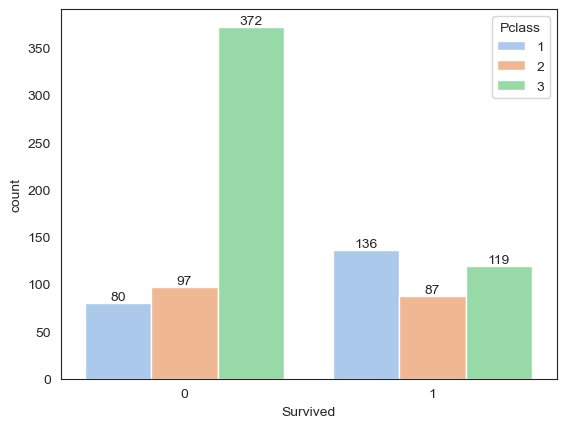

In [17]:
sns.set_style("white")
ax= sns.countplot(x='Survived',hue='Pclass',data=df,palette='pastel')
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

Intrestingly, Most of the Non survivors are from Class 3, and most survived ones are from Class 1. 

Lets check SibSp column

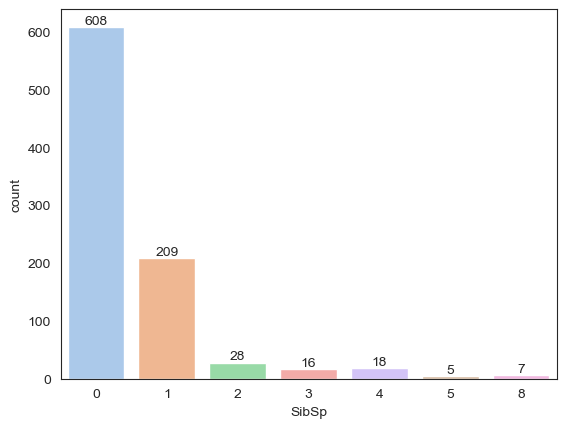

In [18]:
ax= sns.countplot(x='SibSp',data=df,palette='pastel')
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

Most of the passengers on board were single (i.e., without any spouse or children). And 209 passengers with 1 SibSp, seems like they were couples, rather than a single parent with a child.

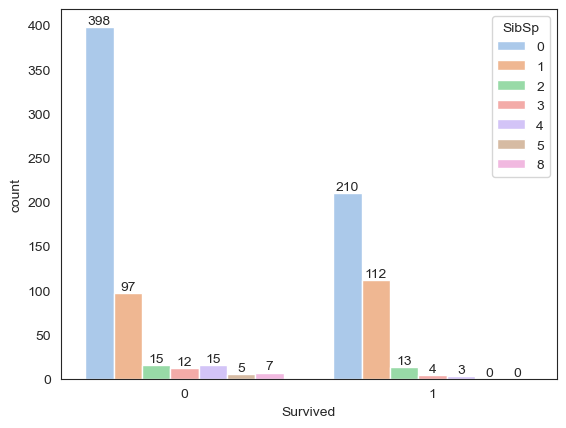

In [19]:
ax= sns.countplot(x='Survived',hue='SibSp',data=df,palette='pastel')
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

The passengers with more than 2 SibSp's barely survived 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


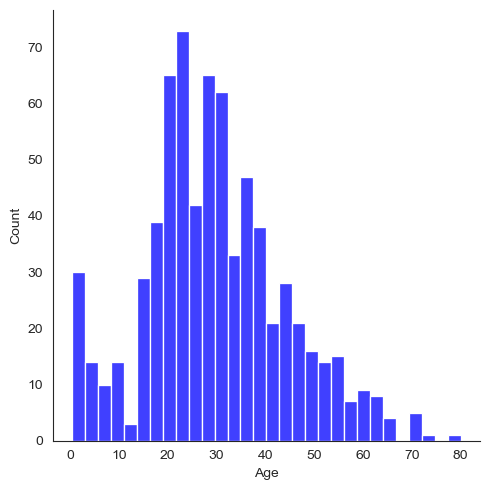

In [21]:
sns.displot(train['Age'].dropna(),kde=False,color='blue',bins=30)

<Axes: xlabel='Age', ylabel='Count'>

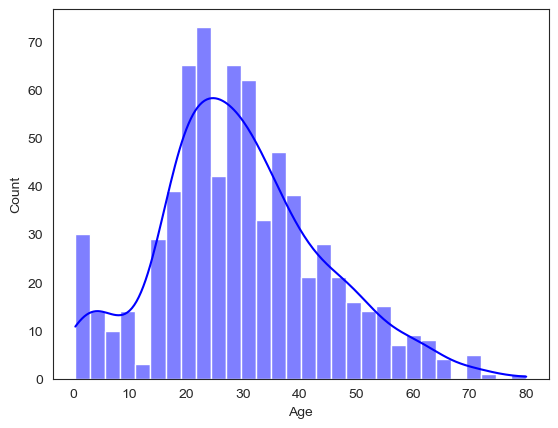

In [27]:
sns.histplot(train['Age'].dropna(), kde=True,color='blue',bins=30)

Excluding the missing values from Age column for now, most of the passengers were younger ones on the ship and few older ones

<Axes: xlabel='Fare', ylabel='Count'>

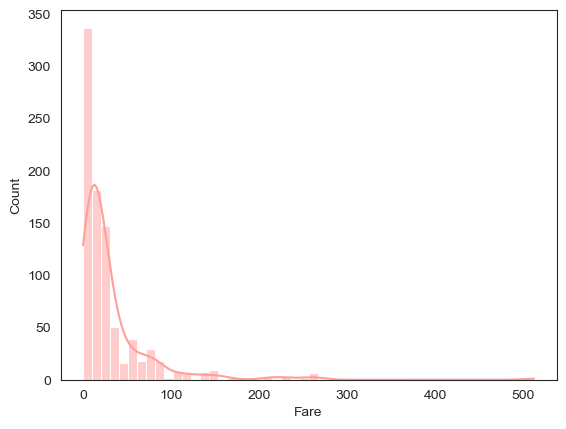

In [34]:
sns.histplot(train['Fare'].dropna(), kde=True,color='#ff9f9b',bins=50)

Most of the passengers paid fares less than 100$, same thing we observed earlier that most of the passengers were from class 3

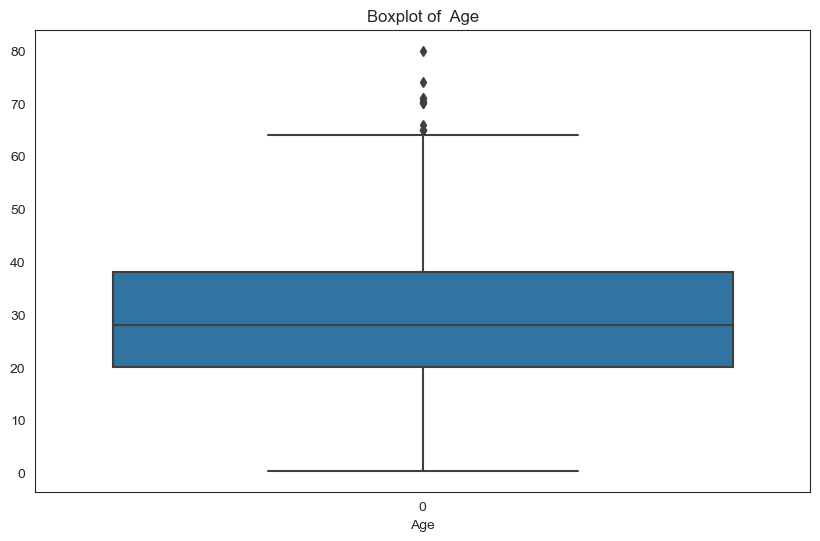

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['Age'])
plt.title(f'Boxplot of  Age')
plt.xlabel('Age')
plt.show()

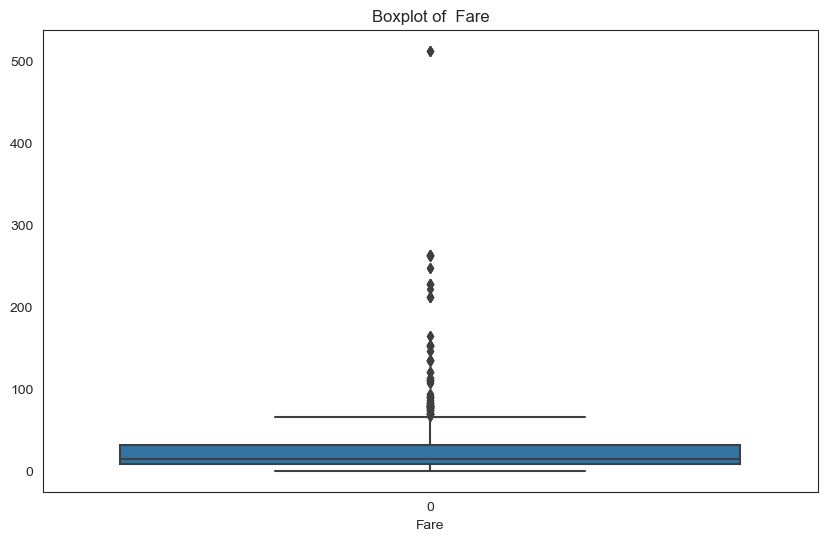

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['Fare'])
plt.title(f'Boxplot of  Fare')
plt.xlabel('Fare')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


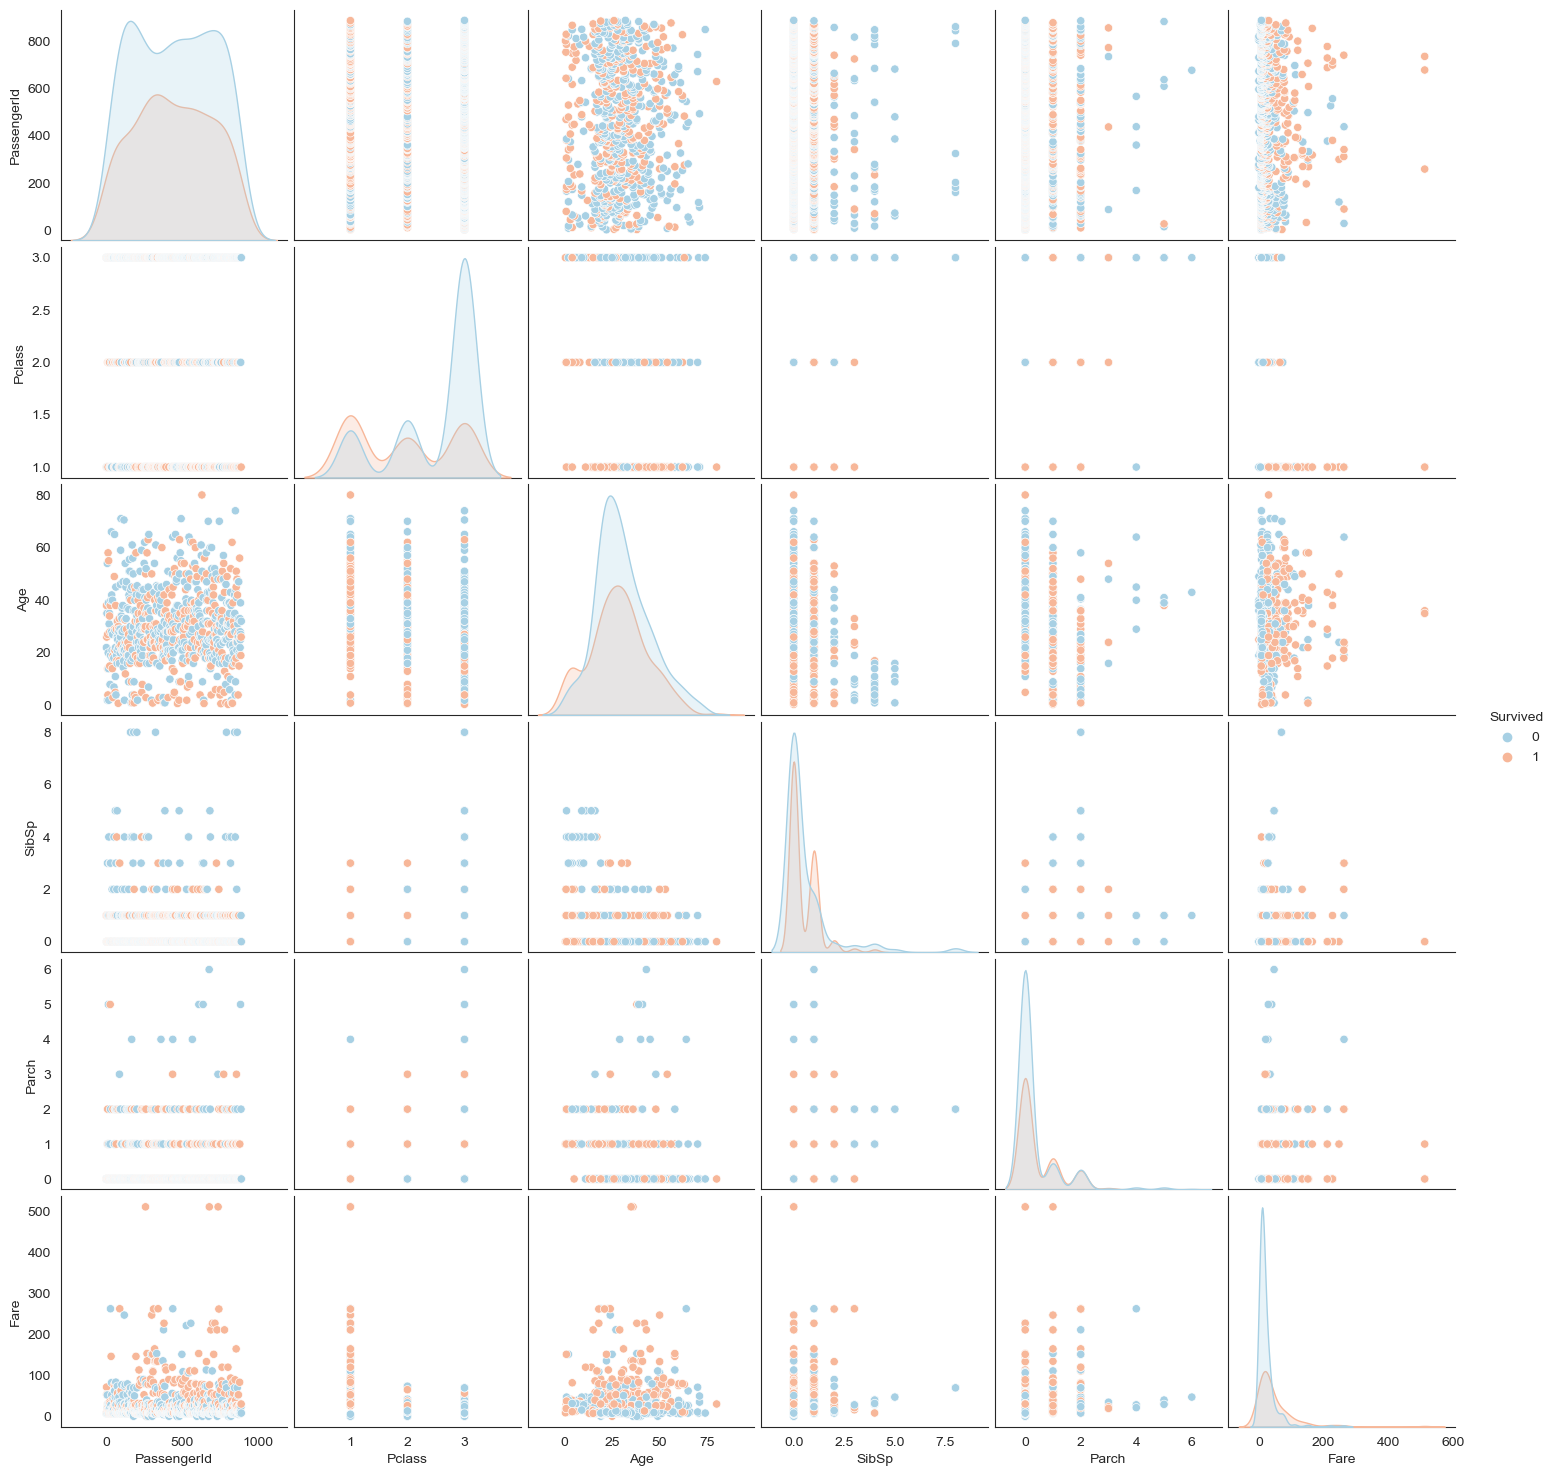

In [47]:
sns.pairplot(data=df,hue='Survived',palette='RdBu_r')

### Data Cleaning

<Axes: xlabel='Pclass', ylabel='Age'>

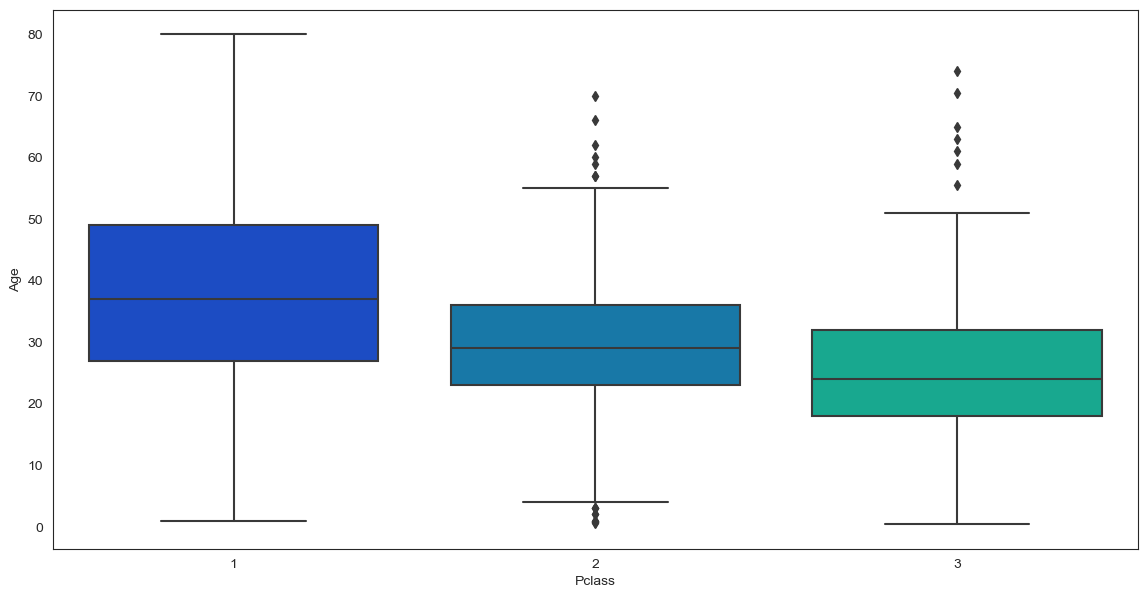

In [48]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [49]:
mean_ages = df.groupby('Pclass')['Age'].mean()

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        return mean_ages[Pclass]
    else:
        return Age

In [52]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [53]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

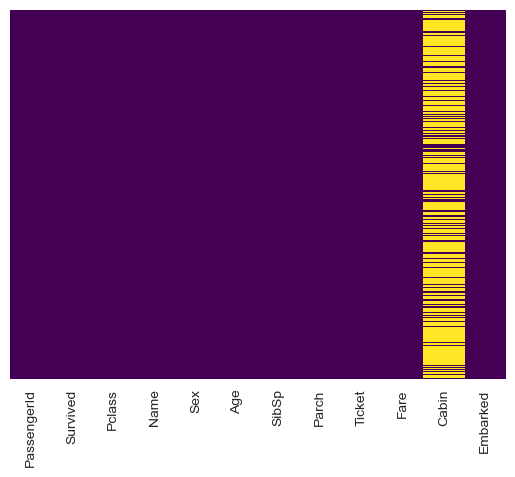

In [54]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Lot of information from Cabin column is missing, we cannot extract information from it. Dropping Cabin Column

In [55]:
df.drop('Cabin',axis=1,inplace=True)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


Dropping remaining Null Values from Embarked column

In [56]:
df.dropna(inplace=True)

In [57]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

No Nulls present

Dropping PassengerId, it is just an Id given to passenger, from 1 to 891. 

In [58]:
df.drop('PassengerId',axis=1,inplace=True)

In [59]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


Saving file for future use

In [60]:
df.to_csv('titanic_cleaned.csv', index=False)

### Encoding Categorical Features

In [61]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [62]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [63]:
df = pd.concat([df,sex,embark],axis=1)

In [64]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.00000,1,0,7.2500,True,False,True
1,1,1,38.00000,1,0,71.2833,False,False,False
2,1,3,26.00000,0,0,7.9250,False,False,True
3,1,1,35.00000,1,0,53.1000,False,False,True
4,0,3,35.00000,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,True,False,True
887,1,1,19.00000,0,0,30.0000,False,False,True
888,0,3,25.14062,1,2,23.4500,False,False,True
889,1,1,26.00000,0,0,30.0000,True,False,False


In [65]:
df.skew()

Survived    0.484568
Pclass     -0.636998
Age         0.507710
SibSp       3.691058
Parch       2.745160
Fare        4.801440
male       -0.625625
Q           2.944406
S          -1.006192
dtype: float64

No extra ordinary skewness 

### Standardizing 

In [66]:
from sklearn.preprocessing import StandardScaler

features_to_standardize = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
scaler = StandardScaler()

df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])

print(df)

     Survived    Pclass       Age     SibSp     Parch      Fare   male      Q  \
0           0  0.825209 -0.550252  0.431350 -0.474326 -0.500240   True  False   
1           1 -1.572211  0.664719  0.431350 -0.474326  0.788947  False  False   
2           1  0.825209 -0.246509 -0.475199 -0.474326 -0.486650  False  False   
3           1 -1.572211  0.436912  0.431350 -0.474326  0.422861  False  False   
4           0  0.825209  0.436912 -0.475199 -0.474326 -0.484133   True  False   
..        ...       ...       ...       ...       ...       ...    ...    ...   
886         0 -0.373501 -0.170574 -0.475199 -0.474326 -0.384475   True  False   
887         1 -1.572211 -0.778059 -0.475199 -0.474326 -0.042213  False  False   
888         0  0.825209 -0.311767  0.431350  2.006119 -0.174084  False  False   
889         1 -1.572211 -0.246509 -0.475199 -0.474326 -0.042213   True  False   
890         0  0.825209  0.209105 -0.475199 -0.474326 -0.490173   True   True   

         S  
0     True  
1

### Model Building and Selection of Best Model

<Axes: >

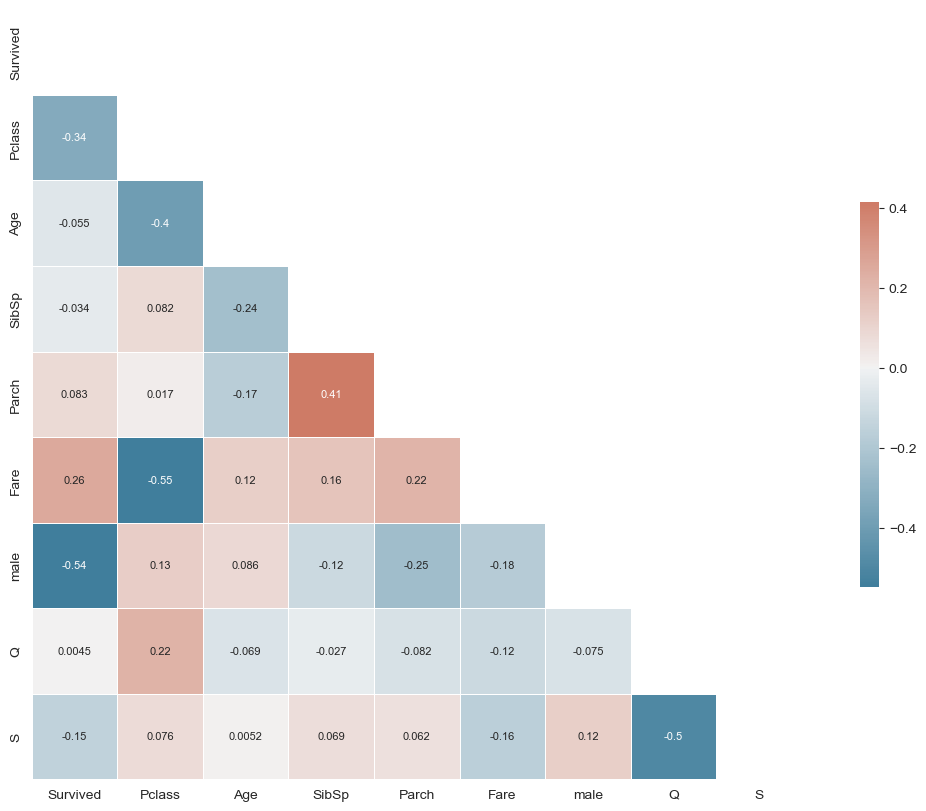

In [67]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
 
f, ax = plt.subplots(figsize=(15, 10))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":8})

In [68]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [90]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [70]:
def metric_score(clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(X_train)
        
        
        print("\n======================Train Result=================")
        
        print(f"AccuracScore:{accuracy_score(y_train,y_pred)*100:.2f}%")
        
    
    elif train==False:
        pred=clf.predict(X_test)
        
        print("\n======================Test Result=================")
        
        print(f"AccuracScore:{accuracy_score(y_test,pred)*100:.2f}%")
        
        
        print("\n \n Test Classification Report \n", classification_report(y_test,pred,digits=2))

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

In [76]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [77]:
metric_score(lr,X_train,X_test,y_train,y_test,train=True)


metric_score(lr,X_train,X_test,y_train,y_test,train=False)


======================Train Result=================
AccuracScore:81.51%

======================Test Result=================
AccuracScore:79.40%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       158
           1       0.79      0.67      0.73       109

    accuracy                           0.79       267
   macro avg       0.79      0.77      0.78       267
weighted avg       0.79      0.79      0.79       267



In [81]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
kn=KNeighborsClassifier()
gbdt=GradientBoostingClassifier()

Threshold of  Logistic Regression [       inf 0.97632441 0.76625032 0.76513796 0.75635868 0.74708324
 0.7463637  0.73701842 0.73609456 0.72852301 0.72671335 0.71693412
 0.71673125 0.71662974 0.71644392 0.68202308 0.67452646 0.66932051
 0.66545112 0.6594647  0.65296922 0.65220948 0.63715239 0.63642246
 0.63631525 0.63000286 0.6230865  0.58988791 0.5776949  0.57069716
 0.56158357 0.5487097  0.52936038 0.49534274 0.48917064 0.48150353
 0.47770499 0.41690636 0.39500372 0.38661621 0.36496221 0.33164669
 0.2971413  0.29670934 0.2930712  0.29207765 0.29057398 0.28022379
 0.2782768  0.27697769 0.27503069 0.27041596 0.21438873 0.21253579
 0.20701508 0.20517907 0.2044242  0.17906652 0.1763353  0.15343398
 0.15282664 0.14647946 0.14644115 0.13097073 0.1304142  0.126329
 0.12465688 0.11607151 0.11318202 0.11298035 0.11212205 0.10966337
 0.10941649 0.10938192 0.1093759  0.10632716 0.10610216 0.10604559
 0.10600128 0.10580893 0.10336269 0.10243925 0.09999542 0.09868476
 0.09837186 0.09731641 0.09499

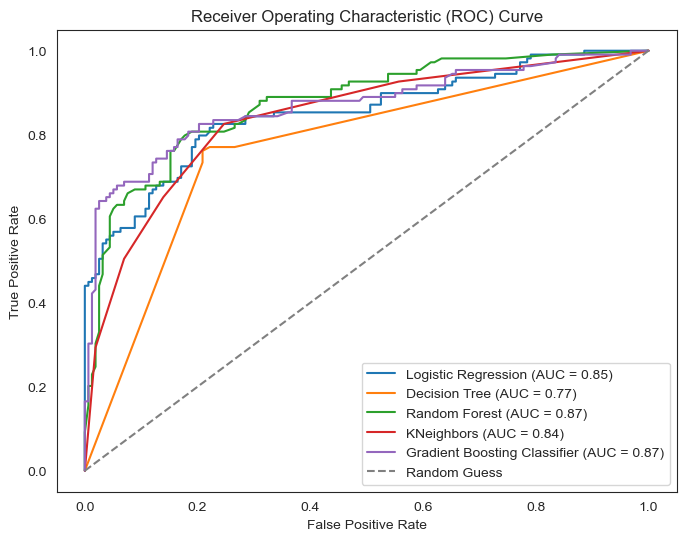

In [82]:
models =  {'Logistic Regression': lr,'Decision Tree': dt,'Random Forest': rf,'KNeighbors': kn,'Gradient Boosting Classifier': gbdt}

plt.figure(figsize=(8,6))
for name, model in models.items():
    model.fit(X_train,y_train)
    y_prob=model.predict_proba(X_test)[:, 1]
    fpr,tpr,_=roc_curve(y_test,y_prob)
    print('Threshold of ',name, _)
    roc_auc=auc(fpr,tpr)
    
    
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(name,roc_auc))
    
plt.plot([0,1],[0,1],linestyle='--',color='grey',label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')


plt.show()

Random Forest Classifier and Gradient Boosting Classifier performs better than other models

In [83]:
rf = RandomForestClassifier(class_weight='balanced', random_state=57)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=57)

In [85]:
metric_score(rf,X_train,X_test,y_train,y_test,train=True)


metric_score(rf,X_train,X_test,y_train,y_test,train=False)


======================Train Result=================
AccuracScore:98.71%

======================Test Result=================
AccuracScore:81.65%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       158
           1       0.79      0.74      0.77       109

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267



Seems like model is overfitting

Checking with GBDT

In [86]:
gbdt=GradientBoostingClassifier(random_state=57)

gbdt.fit(X_train,y_train)

GradientBoostingClassifier(random_state=57)

In [87]:
metric_score(gbdt,X_train,X_test,y_train,y_test,train=True)


metric_score(gbdt,X_train,X_test,y_train,y_test,train=False)


======================Train Result=================
AccuracScore:90.19%

======================Test Result=================
AccuracScore:82.02%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       158
           1       0.84      0.69      0.76       109

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.82      0.82      0.82       267



#### Hyperparameter Tuning both the models
##### Random Forest Classifier

In [88]:
grid_param = {
    'n_estimators':np.arange(0,17),
    'criterion': ['gini', 'entropy'],
    'max_depth' : [10,15],
    'min_samples_leaf' : np.arange(0,7),
    'min_samples_split' : [10,11]
}

In [94]:
param_grid = {
    'n_estimators': [10, 50, 100, 200,250,300],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 4,6,8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50,60,90],
    'bootstrap': [True, False]
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
4800 fits failed out of a total of 14400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1539 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-pa

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=57),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50, 60, 90],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'n_estimators': [10, 50, 100, 200, 250, 300]},
             verbose=2)

In [95]:
print('best params--->',grid_search.best_params_)

best params---> {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 10}


In [96]:
rf=grid_search.best_estimator_

In [97]:
metric_score(rf,X_train,X_test,y_train,y_test,train=True)


metric_score(rf,X_train,X_test,y_train,y_test,train=False)


======================Train Result=================
AccuracScore:90.03%

======================Test Result=================
AccuracScore:79.78%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       158
           1       0.76      0.73      0.75       109

    accuracy                           0.80       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



In [108]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

gbc = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)


Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.7}
Best accuracy score:  0.8436678727861361


In [109]:
gbc=grid_search.best_estimator_

In [110]:
metric_score(gbc,X_train,X_test,y_train,y_test,train=True)


metric_score(gbc,X_train,X_test,y_train,y_test,train=False)


======================Train Result=================
AccuracScore:92.44%

======================Test Result=================
AccuracScore:92.13%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       158
           1       0.94      0.86      0.90       109

    accuracy                           0.92       267
   macro avg       0.93      0.91      0.92       267
weighted avg       0.92      0.92      0.92       267



Gradient Boosting Classifier Handles overfitting better than Random Forest Classifier. Going Ahead with Gradient Boosting Classifier 

##### Handling Class impbalance 

In [117]:
params = {
    'learning_rate': 0.1,
    'max_depth': 3,
    'max_features': None,
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 200,
    'subsample': 0.7
}

In [118]:
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN



smote = SMOTE(random_state=47)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


ros = RandomOverSampler(random_state=47)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)


adasyn = ADASYN(random_state=47, n_neighbors=5, sampling_strategy='minority')
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)


undersampler = RandomUnderSampler(random_state=47)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)


smote_enn = SMOTEENN(random_state=47)
X_train_smoteenn, y_train_smoteenn = smote_enn.fit_resample(X_train, y_train)


classifiers = {
    'SMOTE': GradientBoostingClassifier(**params),
    'RandomOverSampler': GradientBoostingClassifier(**params),
    'ADASYN': GradientBoostingClassifier(**params),
    'RandomUnderSampler': GradientBoostingClassifier(**params),
    'SMOTEENN': GradientBoostingClassifier(**params)
}


classifiers['SMOTE'].fit(X_train_smote, y_train_smote)
classifiers['RandomOverSampler'].fit(X_train_ros, y_train_ros)
classifiers['ADASYN'].fit(X_train_adasyn, y_train_adasyn)
classifiers['RandomUnderSampler'].fit(X_train_under, y_train_under)
classifiers['SMOTEENN'].fit(X_train_smoteenn, y_train_smoteenn)

print("Classification Reports:")

for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    print(f"\n{name}:")
    print(classification_report(y_test, y_pred))
    metric_score(clf,X_train,X_test,y_train,y_test,train=True)
    
    metric_score(clf,X_train,X_test,y_train,y_test,train=False)
    print('---------------------------------------------------')


Classification Reports:

SMOTE:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       159
           1       0.82      0.76      0.79       108

    accuracy                           0.84       267
   macro avg       0.83      0.82      0.83       267
weighted avg       0.83      0.84      0.83       267


======================Train Result=================
AccuracScore:93.57%

======================Test Result=================
AccuracScore:83.52%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.89      0.87       159
           1       0.82      0.76      0.79       108

    accuracy                           0.84       267
   macro avg       0.83      0.82      0.83       267
weighted avg       0.83      0.84      0.83       267

---------------------------------------------------

RandomOverSampler:
              precision    recall  f1-score   support

         

Handling class imbalance has adverse effect on model performance

In [111]:
metric_score(gbc,X_train,X_test,y_train,y_test,train=True)


metric_score(gbc,X_train,X_test,y_train,y_test,train=False)


======================Train Result=================
AccuracScore:92.44%

======================Test Result=================
AccuracScore:92.13%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       158
           1       0.94      0.86      0.90       109

    accuracy                           0.92       267
   macro avg       0.93      0.91      0.92       267
weighted avg       0.92      0.92      0.92       267



#### Cross Validation 

In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

scores_accuracy = cross_val_score(gbc, X_train, y_train, cv=5, scoring='accuracy')
scores_precision = cross_val_score(gbc, X_train, y_train, cv=5, scoring=scoring['precision'])
scores_recall = cross_val_score(gbc, X_train, y_train, cv=5, scoring=scoring['recall'])
scores_f1_macro = cross_val_score(gbc, X_train, y_train, cv=5, scoring=scoring['f1_macro'])

print(f"Mean Accuracy: {scores_accuracy.mean():.2f}")
print(f"Mean Precision: {scores_precision.mean():.2f}")
print(f"Mean Recall: {scores_recall.mean():.2f}")
print(f"Mean F1-score (Macro): {scores_f1_macro.mean():.2f}")


Mean Accuracy: 0.81
Mean Precision: 0.79
Mean Recall: 0.78
Mean F1-score (Macro): 0.78


#### Best Random States

In [116]:
split_random_states = range(1, 57)
model_random_states = range(1, 57)

best_split_random_state = None
best_model_random_state = None
best_accuracy = 0

for split_state in split_random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=split_state)
    
    for model_state in model_random_states:
        model = GradientBoostingClassifier(random_state=model_state)
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_split_random_state = split_state
            best_model_random_state = model_state

print(f"The best random state for train-test split is {best_split_random_state}")
print(f"The best random state for Random Forest is {best_model_random_state}")
print(f"The best accuracy achieved is {best_accuracy:.4f}")


The best random state for train-test split is 1
The best random state for Random Forest is 22
The best accuracy achieved is 0.8614


#### Checking performance with Stacking

In [119]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


X['male'] = X['male'].astype(int)
X['Q'] = X['Q'].astype(int)
X['S'] = X['S'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

base_models = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=22)),
    ('gb', GradientBoostingClassifier(n_estimators=10, random_state=22)),
    ('svm', SVC(probability=True, random_state=22))
]

meta_features_train = np.zeros((X_train.shape[0], len(base_models)))
meta_features_test = np.zeros((X_test.shape[0], len(base_models)))

for i, (name, model) in enumerate(base_models):
    model.fit(X_train, y_train)
    meta_features_train[:, i] = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')[:, 1]
    meta_features_test[:, i] = model.predict_proba(X_test)[:, 1]

meta_model = LogisticRegression(random_state=42)
meta_model.fit(meta_features_train, y_train)
meta_predictions = meta_model.predict(meta_features_test)

accuracy = accuracy_score(y_test, meta_predictions)
print(f'Stacking Accuracy: {accuracy:.4f}')


Stacking Accuracy: 0.8614


#### Checking performance with Blending

In [120]:
X_blend_train, X_blend_test, y_blend_train, y_blend_test = train_test_split(X_train, y_train, test_size=0.3, random_state=2)

blend_base_models = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=22)),
    ('gb', GradientBoostingClassifier(n_estimators=10, random_state=22)),
    ('svm', SVC(probability=True, random_state=22))
]


blend_meta_features_train = np.zeros((X_blend_test.shape[0], len(blend_base_models)))
blend_meta_features_test = np.zeros((X_test.shape[0], len(blend_base_models)))

for i, (name, model) in enumerate(blend_base_models):
    model.fit(X_blend_train, y_blend_train)
    blend_meta_features_train[:, i] = model.predict_proba(X_blend_test)[:, 1]
    blend_meta_features_test[:, i] = model.predict_proba(X_test)[:, 1]

blend_meta_model = LogisticRegression(random_state=42)
blend_meta_model.fit(blend_meta_features_train, y_blend_test)
blend_meta_predictions = blend_meta_model.predict(blend_meta_features_test)

blend_accuracy = accuracy_score(y_test, blend_meta_predictions)
print(f'Blending Accuracy: {blend_accuracy:.4f}')

Blending Accuracy: 0.8427


#### Creating New Features to improve model performance

In [123]:
df1=pd.read_csv('titanic_cleaned.csv')

In [124]:
sex = pd.get_dummies(df1['Sex'],drop_first=True)
embark = pd.get_dummies(df1['Embarked'],drop_first=True)

In [125]:
df1 = pd.concat([df1,sex,embark],axis=1)

In [126]:
df1['Family_Size'] = df1['SibSp'] + df1['Parch'] + 1 


df1['Fare_Per_Person'] = df1['Fare'] / df1['Family_Size']


bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Middle_Aged', 'Senior']
df1['Age_Group'] = pd.cut(df1['Age'], bins, labels=labels)


df1['Is_Alone'] = (df1['Family_Size'] == 1).astype(int)

In [127]:
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,Family_Size,Fare_Per_Person,Age_Group,Is_Alone
0,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,True,False,True,2,3.62500,Adult,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,False,False,False,2,35.64165,Middle_Aged,0
2,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S,False,False,True,1,7.92500,Adult,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S,False,False,True,2,26.55000,Adult,0
4,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,True,False,True,1,8.05000,Adult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S,True,False,True,1,13.00000,Adult,1
885,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S,False,False,True,1,30.00000,Adult,1
886,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S,False,False,True,4,5.86250,Adult,0
887,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C,True,False,False,1,30.00000,Adult,1


In [128]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,Family_Size,Fare_Per_Person,Age_Group,Is_Alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True,2,3.62500,Adult,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False,2,35.64165,Middle_Aged,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True,1,7.92500,Adult,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True,2,26.55000,Adult,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True,1,8.05000,Adult,1


In [129]:
df1['Age_Group'].value_counts()

Age_Group
Adult          505
Middle_Aged    224
Teen            70
Child           69
Senior          21
Name: count, dtype: int64

In [131]:
age_group_order = ['Adult', 'Middle_Aged', 'Teen', 'Child', 'Senior']


age_group_mapping = {group: idx for idx, group in enumerate(age_group_order)}


df1['Age_Group_Encoded'] = df1['Age_Group'].map(age_group_mapping)

In [132]:
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,Family_Size,Fare_Per_Person,Age_Group,Is_Alone,Age_Group_Encoded
0,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,True,False,True,2,3.62500,Adult,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,False,False,False,2,35.64165,Middle_Aged,0,1
2,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S,False,False,True,1,7.92500,Adult,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S,False,False,True,2,26.55000,Adult,0,0
4,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,True,False,True,1,8.05000,Adult,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S,True,False,True,1,13.00000,Adult,1,0
885,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S,False,False,True,1,30.00000,Adult,1,0
886,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S,False,False,True,4,5.86250,Adult,0,0
887,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C,True,False,False,1,30.00000,Adult,1,0


In [133]:
df1.drop(['Name','Sex','Ticket','Age_Group'],axis=1,inplace=True)

In [138]:
df1.drop(['Embarked'],axis=1,inplace=True)

In [139]:
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Family_Size,Fare_Per_Person,Is_Alone,Age_Group_Encoded
0,0,3,22.00000,1,0,7.2500,True,False,True,2,3.62500,0,0
1,1,1,38.00000,1,0,71.2833,False,False,False,2,35.64165,0,1
2,1,3,26.00000,0,0,7.9250,False,False,True,1,7.92500,1,0
3,1,1,35.00000,1,0,53.1000,False,False,True,2,26.55000,0,0
4,0,3,35.00000,0,0,8.0500,True,False,True,1,8.05000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,27.00000,0,0,13.0000,True,False,True,1,13.00000,1,0
885,1,1,19.00000,0,0,30.0000,False,False,True,1,30.00000,1,0
886,0,3,25.14062,1,2,23.4500,False,False,True,4,5.86250,0,0
887,1,1,26.00000,0,0,30.0000,True,False,False,1,30.00000,1,0


In [142]:
features_to_standardize = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Family_Size','Fare_Per_Person','Is_Alone']
scaler = StandardScaler()

df1[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])

print(df)

     Survived    Pclass       Age     SibSp     Parch      Fare   male      Q  \
0           0  0.825209 -0.550252  0.431350 -0.474326 -0.500240   True  False   
1           1 -1.572211  0.664719  0.431350 -0.474326  0.788947  False  False   
2           1  0.825209 -0.246509 -0.475199 -0.474326 -0.486650  False  False   
3           1 -1.572211  0.436912  0.431350 -0.474326  0.422861  False  False   
4           0  0.825209  0.436912 -0.475199 -0.474326 -0.484133   True  False   
..        ...       ...       ...       ...       ...       ...    ...    ...   
886         0 -0.373501 -0.170574 -0.475199 -0.474326 -0.384475   True  False   
887         1 -1.572211 -0.778059 -0.475199 -0.474326 -0.042213  False  False   
888         0  0.825209 -0.311767  0.431350  2.006119 -0.174084  False  False   
889         1 -1.572211 -0.246509 -0.475199 -0.474326 -0.042213   True  False   
890         0  0.825209  0.209105 -0.475199 -0.474326 -0.490173   True   True   

         S  Family_Size  Fa

In [143]:
X=df1.drop('Survived',axis=1)
y=df1['Survived']

In [144]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Family_Size,Fare_Per_Person,Is_Alone,Age_Group_Encoded
0,0.825209,-0.550252,0.431350,-0.474326,-0.500240,True,False,True,-0.025550,0.155577,0.0,0
1,-1.572211,0.664719,0.431350,-0.474326,0.788947,False,False,False,-0.025550,0.257383,0.0,1
2,0.825209,-0.246509,-0.475199,-0.474326,-0.486650,False,False,True,-0.564525,-0.533568,0.0,0
3,-1.572211,0.436912,0.431350,-0.474326,0.422861,False,False,True,-0.025550,0.228474,0.0,0
4,0.825209,0.436912,-0.475199,-0.474326,-0.484133,True,False,True,-0.564525,-0.529800,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
884,-0.373501,-0.170574,-0.475199,-0.474326,-0.384475,True,False,True,-0.564525,-0.380583,0.0,0
885,-1.572211,-0.778059,-0.475199,-0.474326,-0.042213,False,False,True,-0.564525,0.131877,0.0,0
886,0.825209,-0.311767,0.431350,2.006119,-0.174084,False,False,True,1.449160,0.191253,0.0,0
887,-1.572211,-0.246509,-0.475199,-0.474326,-0.042213,True,False,False,-0.564525,0.131877,0.0,0


In [145]:
y

0      0
1      1
2      1
3      1
4      0
      ..
884    0
885    1
886    0
887    1
888    0
Name: Survived, Length: 889, dtype: int64

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [147]:
gbdt=GradientBoostingClassifier(random_state=22)

gbdt.fit(X_train,y_train)

GradientBoostingClassifier(random_state=22)

In [148]:
metric_score(gbdt,X_train,X_test,y_train,y_test,train=True)


metric_score(gbdt,X_train,X_test,y_train,y_test,train=False)


======================Train Result=================
AccuracScore:90.68%

======================Test Result=================
AccuracScore:85.77%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       170
           1       0.86      0.73      0.79        97

    accuracy                           0.86       267
   macro avg       0.86      0.83      0.84       267
weighted avg       0.86      0.86      0.85       267



In [149]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

gbc = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)


Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
Best parameters found:  {'learning_rate': 0.05, 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.9}
Best accuracy score:  0.8459023678029581


In [150]:
gbc=grid_search.best_estimator_

In [151]:
metric_score(gbc,X_train,X_test,y_train,y_test,train=True)


metric_score(gbc,X_train,X_test,y_train,y_test,train=False)


======================Train Result=================
AccuracScore:93.25%

======================Test Result=================
AccuracScore:94.38%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       170
           1       0.94      0.91      0.92        97

    accuracy                           0.94       267
   macro avg       0.94      0.94      0.94       267
weighted avg       0.94      0.94      0.94       267



#### Extracting Features from Name

In [183]:
df2=pd.read_csv('titanic_cleaned.csv')

In [184]:
df2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
884,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
885,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
886,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S
887,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


In [185]:
import re
def extract_title(name):
    title_search = re.search(r'(\bDr\b|\bMr\b|\bMrs\b|\bMiss\b|\bMaster\b)', name)
    if title_search:
        return title_search.group(0)
    else:
        return 'Unknown'

df2['Title'] = df2['Name'].apply(extract_title)

print(df2)

     Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
884         0       2                              Montvila, Rev. Juozas   
885         1       1                       Graham, Miss. Margaret Edith   
886         0       3           Johnston, Miss. Catherine Helen "Carrie"   
887         1       1                              Behr, Mr. Karl Howell   
888         0       3                                Dooley, Mr. Patrick   

        Sex       Age  SibSp  Parch            Ticket     Fare Embarked  \
0      male 

In [186]:
df2['Title'].value_counts()

Title
Mr         518
Miss       181
Mrs        126
Master      40
Unknown     17
Dr           7
Name: count, dtype: int64

In [187]:
sex = pd.get_dummies(df2['Sex'],drop_first=True)
embark = pd.get_dummies(df2['Embarked'],drop_first=True)

In [188]:
df2 = pd.concat([df2,sex,embark],axis=1)

In [189]:
df2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,male,Q,S
0,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,Mr,True,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,Mrs,False,False,False
2,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S,Miss,False,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S,Mrs,False,False,True
4,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,Mr,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S,Unknown,True,False,True
885,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S,Miss,False,False,True
886,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S,Miss,False,False,True
887,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C,Mr,True,False,False


In [190]:
df2['Family_Size'] = df2['SibSp'] + df2['Parch'] + 1 


df2['Fare_Per_Person'] = df2['Fare'] / df2['Family_Size']


bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Middle_Aged', 'Senior']
df2['Age_Group'] = pd.cut(df2['Age'], bins, labels=labels)


df2['Is_Alone'] = (df2['Family_Size'] == 1).astype(int)

In [191]:
df2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,male,Q,S,Family_Size,Fare_Per_Person,Age_Group,Is_Alone
0,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,Mr,True,False,True,2,3.62500,Adult,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,Mrs,False,False,False,2,35.64165,Middle_Aged,0
2,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S,Miss,False,False,True,1,7.92500,Adult,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S,Mrs,False,False,True,2,26.55000,Adult,0
4,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,Mr,True,False,True,1,8.05000,Adult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S,Unknown,True,False,True,1,13.00000,Adult,1
885,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S,Miss,False,False,True,1,30.00000,Adult,1
886,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S,Miss,False,False,True,4,5.86250,Adult,0
887,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C,Mr,True,False,False,1,30.00000,Adult,1


In [192]:
age_group_order = ['Adult', 'Middle_Aged', 'Teen', 'Child', 'Senior']


age_group_mapping = {group: idx for idx, group in enumerate(age_group_order)}


df2['Age_Group_Encoded'] = df2['Age_Group'].map(age_group_mapping)

In [193]:
ord_encodings_title = {
    'Mr':1,
    'Miss':2,
    'Mrs':3,
    'Master':4,
    'Unknown':5,
    'Dr':6
}

df2['title_enc']=df2['Title'].map(ord_encodings_title)

In [194]:
df2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,male,Q,S,Family_Size,Fare_Per_Person,Age_Group,Is_Alone,Age_Group_Encoded,title_enc
0,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,Mr,True,False,True,2,3.62500,Adult,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,Mrs,False,False,False,2,35.64165,Middle_Aged,0,1,3
2,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S,Miss,False,False,True,1,7.92500,Adult,1,0,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S,Mrs,False,False,True,2,26.55000,Adult,0,0,3
4,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,Mr,True,False,True,1,8.05000,Adult,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S,Unknown,True,False,True,1,13.00000,Adult,1,0,5
885,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S,Miss,False,False,True,1,30.00000,Adult,1,0,2
886,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S,Miss,False,False,True,4,5.86250,Adult,0,0,2
887,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C,Mr,True,False,False,1,30.00000,Adult,1,0,1


In [196]:
df2.drop(['Name','Sex','Ticket','Embarked','Title','Age_Group'],axis=1,inplace=True)

In [197]:
df2

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Family_Size,Fare_Per_Person,Is_Alone,Age_Group_Encoded,title_enc
0,0,3,22.00000,1,0,7.2500,True,False,True,2,3.62500,0,0,1
1,1,1,38.00000,1,0,71.2833,False,False,False,2,35.64165,0,1,3
2,1,3,26.00000,0,0,7.9250,False,False,True,1,7.92500,1,0,2
3,1,1,35.00000,1,0,53.1000,False,False,True,2,26.55000,0,0,3
4,0,3,35.00000,0,0,8.0500,True,False,True,1,8.05000,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,27.00000,0,0,13.0000,True,False,True,1,13.00000,1,0,5
885,1,1,19.00000,0,0,30.0000,False,False,True,1,30.00000,1,0,2
886,0,3,25.14062,1,2,23.4500,False,False,True,4,5.86250,0,0,2
887,1,1,26.00000,0,0,30.0000,True,False,False,1,30.00000,1,0,1


In [199]:
features_to_standardize = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Family_Size','Fare_Per_Person','Is_Alone','title_enc']
scaler = StandardScaler()

df2[features_to_standardize] = scaler.fit_transform(df2[features_to_standardize])

print(df2)

     Survived    Pclass       Age     SibSp     Parch      Fare   male      Q  \
0           0  0.825209 -0.550252  0.431350 -0.474326 -0.500240   True  False   
1           1 -1.572211  0.664719  0.431350 -0.474326  0.788947  False  False   
2           1  0.825209 -0.246509 -0.475199 -0.474326 -0.486650  False  False   
3           1 -1.572211  0.436912  0.431350 -0.474326  0.422861  False  False   
4           0  0.825209  0.436912 -0.475199 -0.474326 -0.484133   True  False   
..        ...       ...       ...       ...       ...       ...    ...    ...   
884         0 -0.373501 -0.170574 -0.475199 -0.474326 -0.384475   True  False   
885         1 -1.572211 -0.778059 -0.475199 -0.474326 -0.042213  False  False   
886         0  0.825209 -0.311767  0.431350  2.006119 -0.174084  False  False   
887         1 -1.572211 -0.246509 -0.475199 -0.474326 -0.042213   True  False   
888         0  0.825209  0.209105 -0.475199 -0.474326 -0.490173   True   True   

         S  Family_Size  Fa

In [200]:
X=df2.drop('Survived',axis=1)
y=df2['Survived']

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [202]:
gbdt=GradientBoostingClassifier(random_state=22)

gbdt.fit(X_train,y_train)

GradientBoostingClassifier(random_state=22)

In [203]:
metric_score(gbdt,X_train,X_test,y_train,y_test,train=True)


metric_score(gbdt,X_train,X_test,y_train,y_test,train=False)


======================Train Result=================
AccuracScore:91.64%

======================Test Result=================
AccuracScore:86.89%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       170
           1       0.84      0.78      0.81        97

    accuracy                           0.87       267
   macro avg       0.86      0.85      0.86       267
weighted avg       0.87      0.87      0.87       267



In [204]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

gbdt = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gbdt, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)


Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
Best parameters found:  {'learning_rate': 0.05, 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 1.0}
Best accuracy score:  0.847025963308576


In [205]:
gbdt=grid_search.best_estimator_

In [206]:
metric_score(gbdt,X_train,X_test,y_train,y_test,train=True)


metric_score(gbdt,X_train,X_test,y_train,y_test,train=False)


======================Train Result=================
AccuracScore:92.60%

======================Test Result=================
AccuracScore:94.76%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       170
           1       0.95      0.91      0.93        97

    accuracy                           0.95       267
   macro avg       0.95      0.94      0.94       267
weighted avg       0.95      0.95      0.95       267

